In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline 

import numpy as np
pd.set_option('display.max_columns', 25)

In [5]:
customer_df = pd.read_csv('customer_value_analysis.csv')


In [6]:
customer_df.head()


,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [7]:
customer_df.shape

(9134, 24)

In [8]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

In [9]:
customer_df.describe()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


In [10]:
customer_df.columns

Index(['Customer', 'State', 'Customer Lifetime Value', 'Response', 'Coverage',
       'Education', 'Effective To Date', 'EmploymentStatus', 'Gender',
       'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size'],
      dtype='object')

In [11]:
customer_df.columns = customer_df.columns.str.replace(' ', '_')
customer_df.columns = customer_df.columns.str.lower()    #Changing the columns to lowercase
customer_df.columns

Index(['customer', 'state', 'customer_lifetime_value', 'response', 'coverage',
       'education', 'effective_to_date', 'employmentstatus', 'gender',
       'income', 'location_code', 'marital_status', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'policy_type',
       'policy', 'renew_offer_type', 'sales_channel', 'total_claim_amount',
       'vehicle_class', 'vehicle_size'],
      dtype='object')

In [12]:
customer_df['effective_to_date'] = pd.to_datetime(customer_df['effective_to_date'])


In [13]:
customer_df.dtypes


customer                                 object
state                                    object
customer_lifetime_value                 float64
response                                 object
coverage                                 object
education                                object
effective_to_date                datetime64[ns]
employmentstatus                         object
gender                                   object
income                                    int64
location_code                            object
marital_status                           object
monthly_premium_auto                      int64
months_since_last_claim                   int64
months_since_policy_inception             int64
number_of_open_complaints                 int64
number_of_policies                        int64
policy_type                              object
policy                                   object
renew_offer_type                         object
sales_channel                           

In [14]:
customer_df.isna().sum()

customer                         0
state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employmentstatus                 0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
dtype: int64

In [15]:
def get_numerical_and_categorical_columns(df):
    numerical_df = df.select_dtypes(include=['int64', 'float64'])
    categorical_df = df.select_dtypes(include=['object'])
    return numerical_df, categorical_df

In [16]:
get_numerical_and_categorical_columns(customer_df)


(      customer_lifetime_value  income  monthly_premium_auto  \
 0                 2763.519279   56274                    69   
 1                 6979.535903       0                    94   
 2                12887.431650   48767                   108   
 3                 7645.861827       0                   106   
 4                 2813.692575   43836                    73   
 ...                       ...     ...                   ...   
 9129             23405.987980   71941                    73   
 9130              3096.511217   21604                    79   
 9131              8163.890428       0                    85   
 9132              7524.442436   21941                    96   
 9133              2611.836866       0                    77   
 
       months_since_last_claim  months_since_policy_inception  \
 0                          32                              5   
 1                          13                             42   
 2                          18     

In [17]:
customer_df.head()


,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [18]:
customer_df = customer_df.drop('customer', axis=1)


In [19]:
customer_df


,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,23405.987980,No,Basic,Bachelor,2011-02-10,Employed,M,71941,Urban,Married,73,18,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,California,3096.511217,Yes,Extended,College,2011-02-12,Employed,F,21604,Suburban,Divorced,79,14,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,California,8163.890428,No,Extended,Bachelor,2011-02-06,Unemployed,M,0,Suburban,Single,85,9,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,California,7524.442436,No,Extended,College,2011-02-03,Employed,M,21941,Suburban,Married,96,34,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


In [20]:
numerical = customer_df.select_dtypes(include=['int', 'float'])


In [21]:
numerical


,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879
...,...,...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,0,2,198.234764
9130,3096.511217,21604,79,14,28,0,1,379.200000
9131,8163.890428,0,85,9,37,3,2,790.784983
9132,7524.442436,21941,96,34,3,0,3,691.200000


In [22]:
corr_matrix = numerical.corr()


<AxesSubplot:>

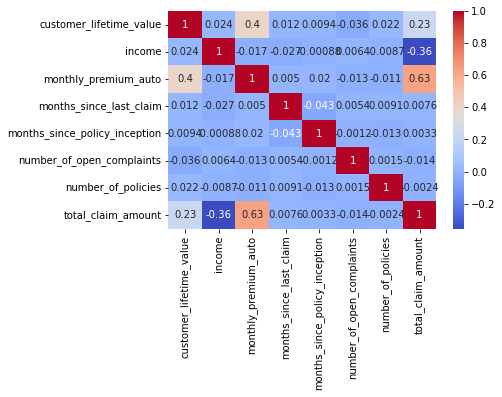

In [23]:
import seaborn as sns
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

In [24]:
def get_numerical_continuous_discrete(df, threshold=36):
    """
    Given a pandas DataFrame, returns two pandas DataFrames:
    the first containing numerical continuous columns and
    the second containing numerical discrete columns.
    The threshold argument sets the maximum number of unique
    values for a numerical column to be classified as discrete.
    """
    numerical_cols = df.select_dtypes(include=[np.number]).columns
    continuous_cols = []
    discrete_cols = []
    for col in numerical_cols:
        if df[col].nunique() > threshold:
            continuous_cols.append(col)
        else:
            discrete_cols.append(col)
    continuous_df = df[continuous_cols]
    discrete_df = df[discrete_cols]
    return continuous_df, discrete_df

In [25]:
continuous_df, discrete_df = get_numerical_continuous_discrete(customer_df)


In [26]:
continuous_df


,customer_lifetime_value,income,monthly_premium_auto,months_since_policy_inception,total_claim_amount
0,2763.519279,56274,69,5,384.811147
1,6979.535903,0,94,42,1131.464935
2,12887.431650,48767,108,38,566.472247
3,7645.861827,0,106,65,529.881344
4,2813.692575,43836,73,44,138.130879
...,...,...,...,...,...
9129,23405.987980,71941,73,89,198.234764
9130,3096.511217,21604,79,28,379.200000
9131,8163.890428,0,85,37,790.784983
9132,7524.442436,21941,96,3,691.200000


In [27]:
discrete_df

,months_since_last_claim,number_of_open_complaints,number_of_policies
0,32,0,1
1,13,0,8
2,18,0,2
3,18,0,7
4,12,0,1
...,...,...,...
9129,18,0,2
9130,14,0,1
9131,9,3,2
9132,34,0,3


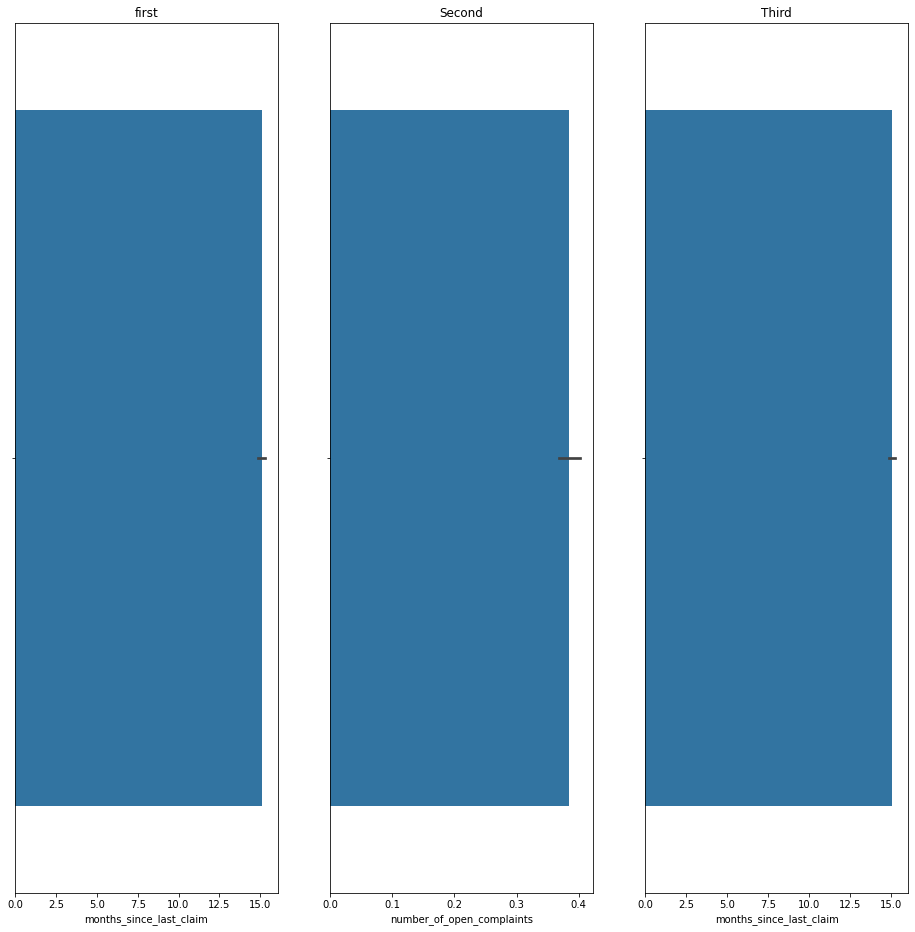

In [28]:
fig, ax = plt.subplots(1,3, figsize=(16,16))
sns.barplot(x="months_since_last_claim", data = discrete_df, ax = ax[0]);
ax[0].set_title("first")
#ax[0].set_ylim((0,25000))
sns.barplot(x="number_of_open_complaints", data = discrete_df, ax = ax[1]);
ax[1].set_title("Second")
#ax[1].set_ylim((0,25000))
sns.barplot(x="months_since_last_claim", data = discrete_df, ax = ax[2]);
ax[2].set_title("Third")
#ax[2].set_ylim((0,25000))
plt.show()

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

def create_discrete_barplots(dataframe):
    plt.figure(figsize=(16,16))
    for i, column in enumerate(dataframe.columns):
        plt.subplot(len(dataframe.columns)//3+1, 3, i+1)
        sns.barplot(dataframe[column])
        plt.title(column)
    plt.tight_layout()
    plt.show()



In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

def discrete_barplots(dataframe):
    plt.figure(figsize=(16,16))
    for i, column in enumerate(dataframe.columns):
        plt.subplot(len(dataframe.columns)//3+1, 3, i+1)
        sns.countplot(dataframe[column])
        plt.title(column)
    plt.tight_layout()
    plt.show()


C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


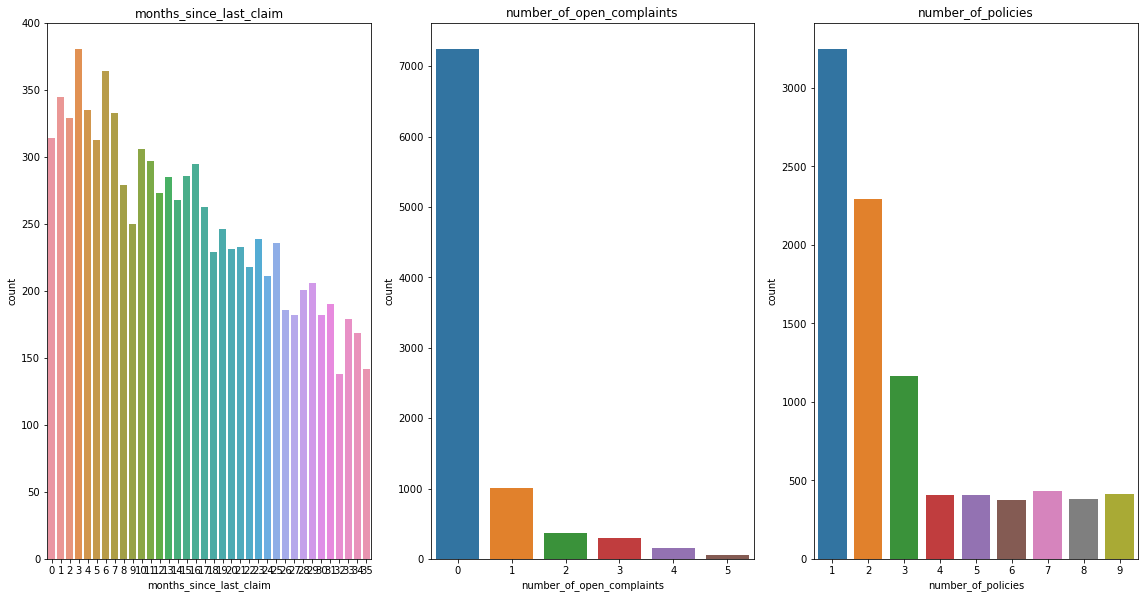

In [31]:
discrete_barplots(discrete_df)

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


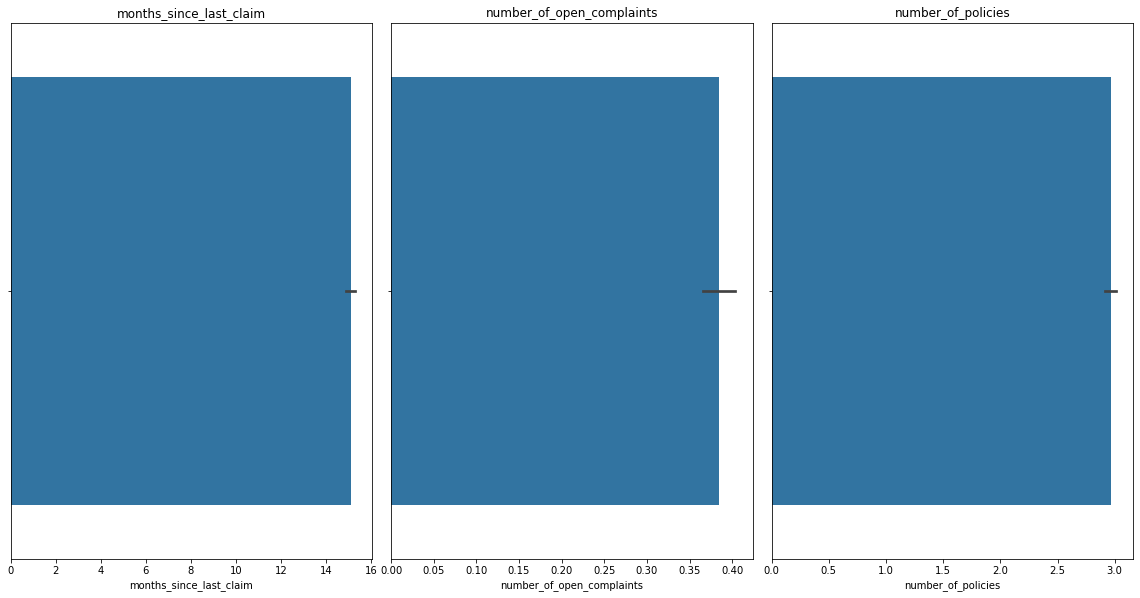

In [32]:
create_discrete_barplots(discrete_df)

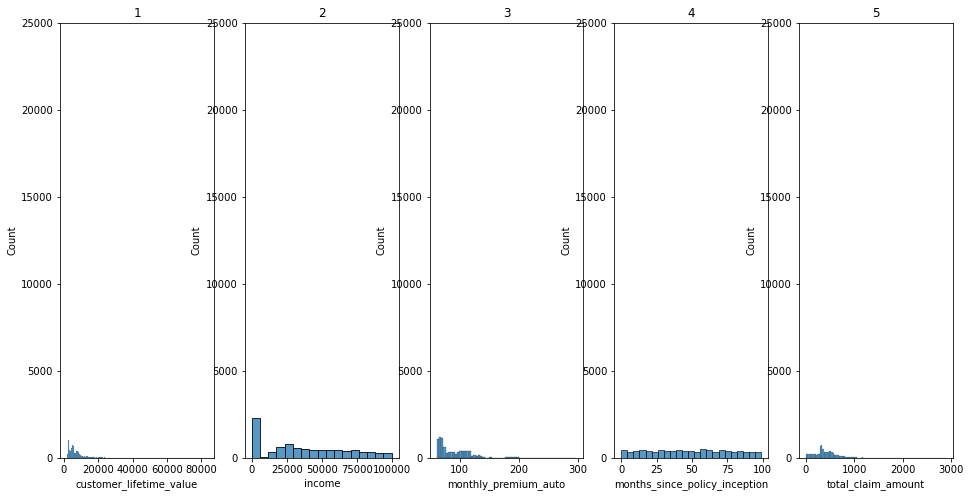

In [33]:
fig, ax = plt.subplots(1,5, figsize=(16,8))
sns.histplot(x="customer_lifetime_value", data = continuous_df, ax = ax[0]);
ax[0].set_title("1")
ax[0].set_ylim((0,25000))

sns.histplot(x="income", data = continuous_df, ax = ax[1]);
ax[1].set_title("2")
ax[1].set_ylim((0,25000))

sns.histplot(x="monthly_premium_auto", data = continuous_df, ax = ax[2]);
ax[2].set_title("3")
ax[2].set_ylim((0,25000))

sns.histplot(x="months_since_policy_inception", data = continuous_df, ax = ax[3]);
ax[3].set_title("4")
ax[3].set_ylim((0,25000))

sns.histplot(x="total_claim_amount", data = continuous_df, ax = ax[4]);
ax[4].set_title("5")
ax[4].set_ylim((0,25000))



plt.show()

In [34]:
import seaborn as sns

def plot_continuous_df_histograms(dataframe):
    plt.figure(figsize=(16,16))
    for i, column in enumerate(dataframe.columns):
        plt.subplot(len(dataframe.columns)//3+1, 3, i+1)
        sns.histplot(dataframe[column], kde=False)
        plt.xlabel(column)
    plt.show()

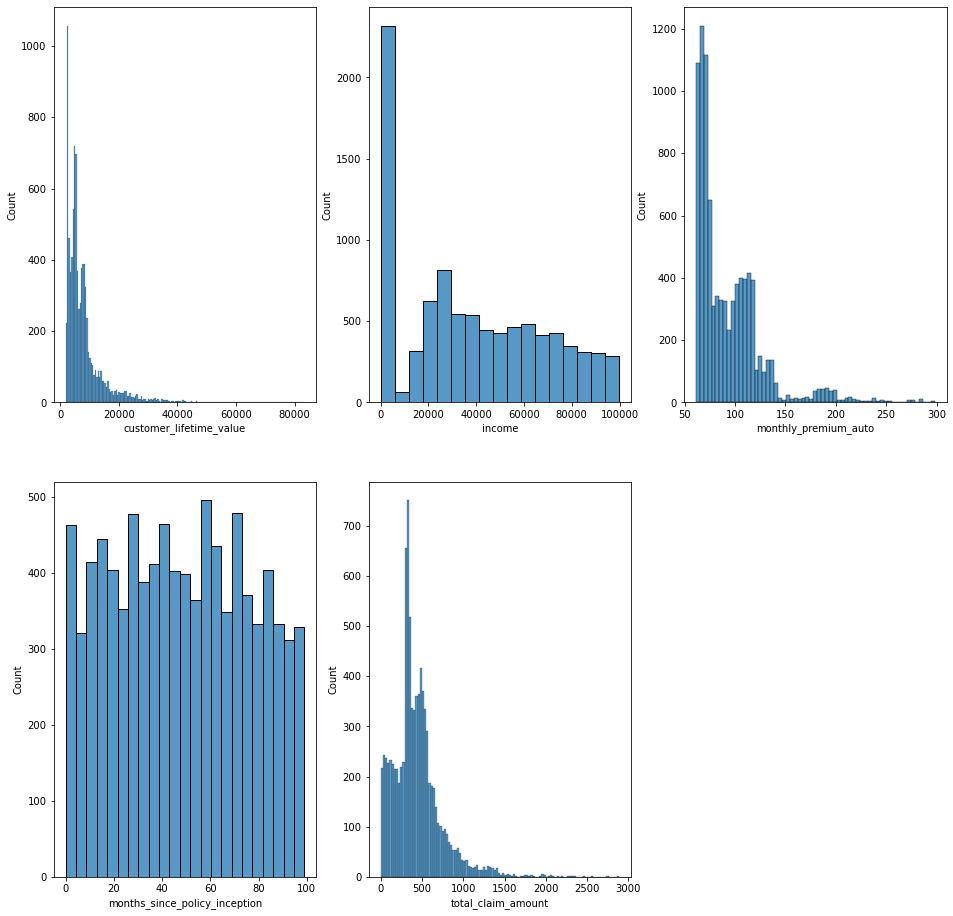

In [35]:
plot_continuous_df_histograms(continuous_df)


In [36]:
import seaborn as sns

def plot_outliers(df):
    fig, axes = plt.subplots(len(df.columns), 1, figsize=(16, 4*len(df.columns)))
    for i, col in enumerate(df.columns):
        sns.boxplot(df[col], ax=axes[i])
        axes[i].set_xlabel(col)

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Dell\anaconda3\lib\site-p

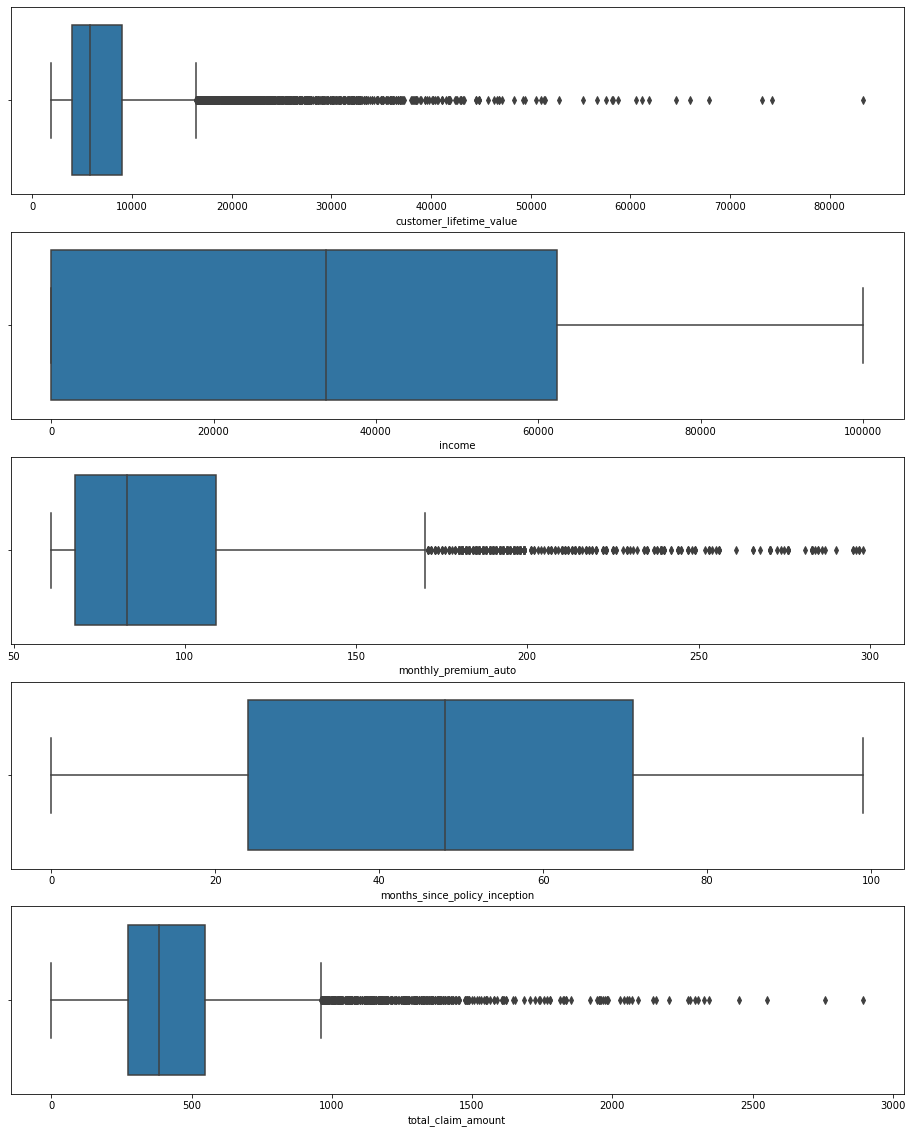

In [37]:
plot_outliers(continuous_df)


# second round cleaning catagorical data

In [38]:
categorical = customer_df.select_dtypes(include=['object'])
categorical  

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,No,Basic,Bachelor,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize
9130,California,Yes,Extended,College,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
9131,California,No,Extended,Bachelor,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize
9132,California,No,Extended,College,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large


In [39]:
categorical.columns

Index(['state', 'response', 'coverage', 'education', 'employmentstatus',
       'gender', 'location_code', 'marital_status', 'policy_type', 'policy',
       'renew_offer_type', 'sales_channel', 'vehicle_class', 'vehicle_size'],
      dtype='object')

In [40]:
def plot_categorical(df):
    categorical_cols = []
    for col in df.columns:
        if df[col].dtype == 'object':
            categorical_cols.append(col)
    value_counts = {}
    for col in categorical_cols:
        value_counts[col] = df[col].value_counts()
        value_counts[col] = value_counts[col].sort_values(ascending=False)
    for col in categorical_cols:
        plt.figure(figsize=(8, 6))
        if len(value_counts[col]) >= 6:
            sns.countplot(y=col, data=df, order=value_counts[col].index)
        else:
            sns.countplot(x=col, data=df, order=value_counts[col].index)
        plt.title(f'{col} Distribution')
        plt.show()


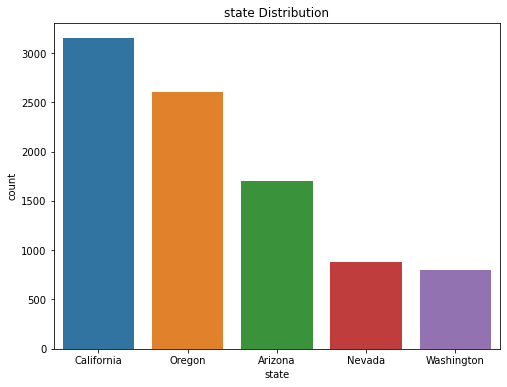

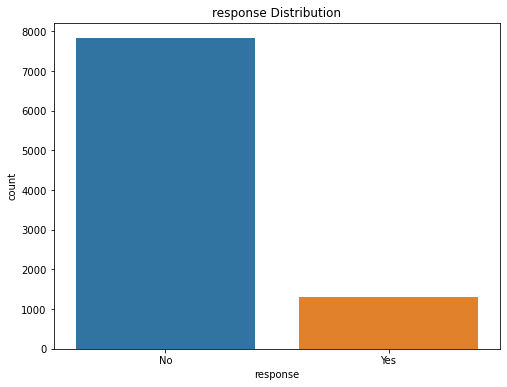

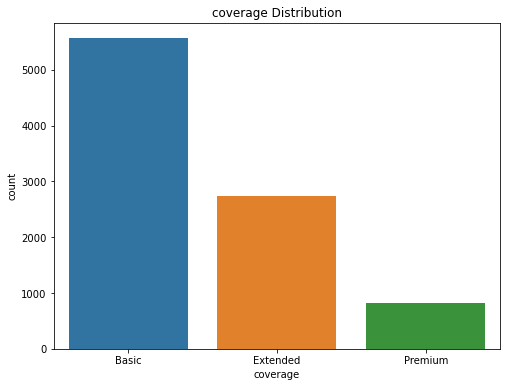

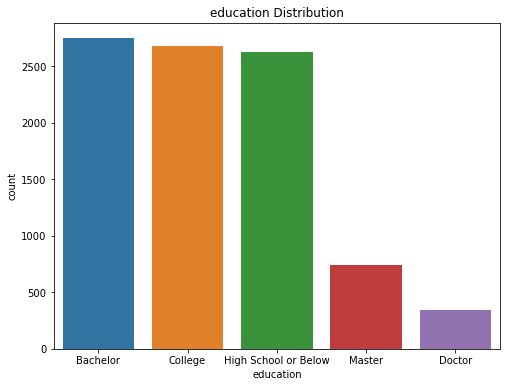

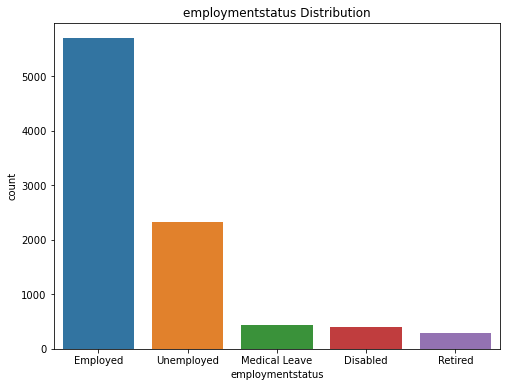

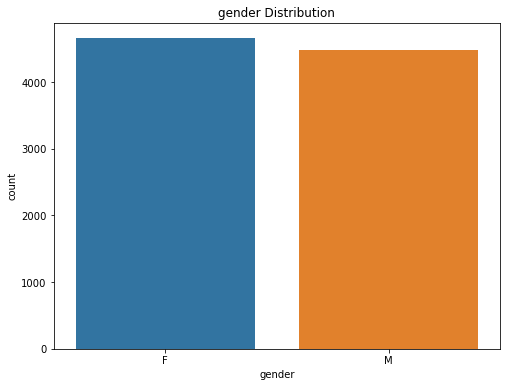

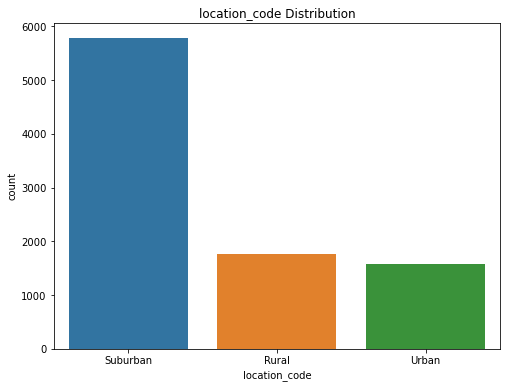

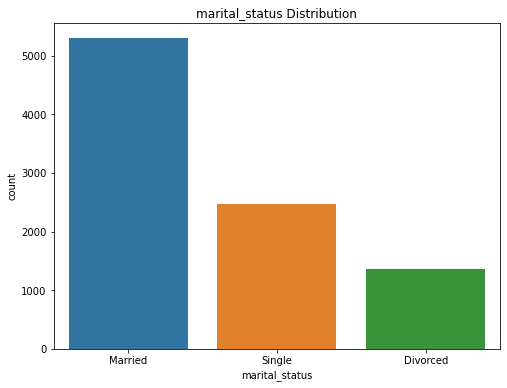

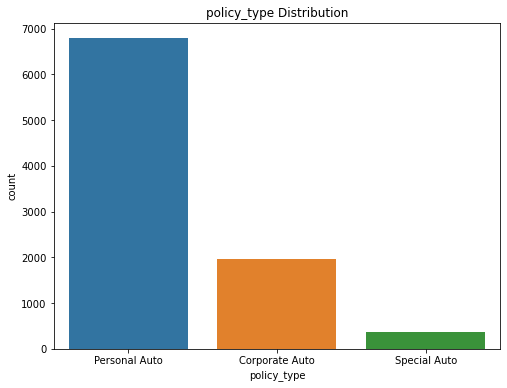

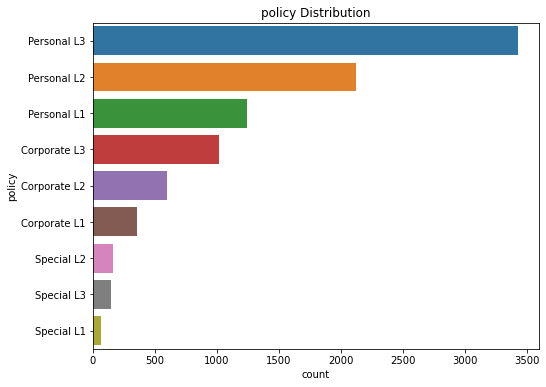

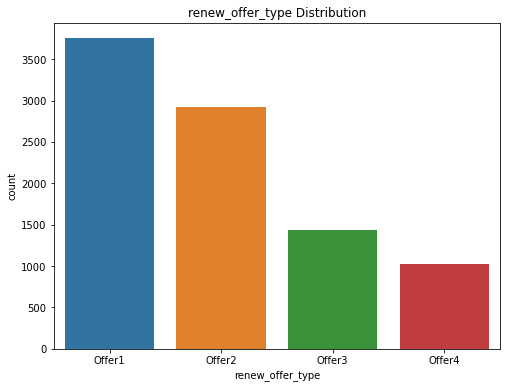

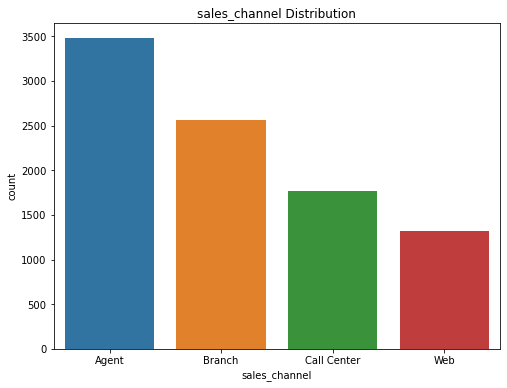

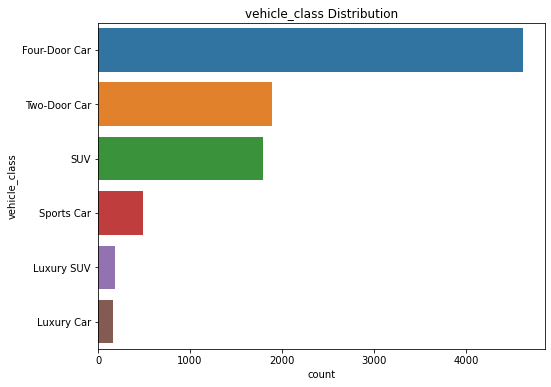

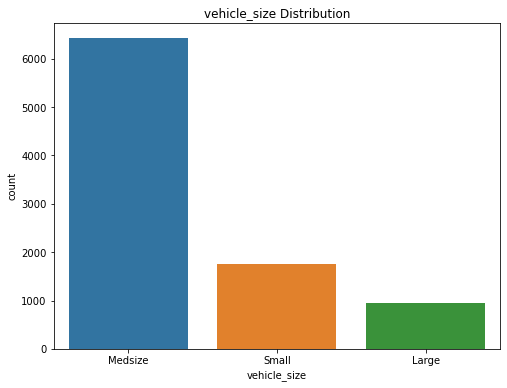

In [41]:
plot_categorical(categorical)


In [42]:
categorical = categorical.drop('policy_type', axis=1)


In [43]:
categorical['policy'].value_counts(dropna=False)


Personal L3     3426
Personal L2     2122
Personal L1     1240
Corporate L3    1014
Corporate L2     595
Corporate L1     359
Special L2       164
Special L3       148
Special L1        66
Name: policy, dtype: int64

In [44]:
def clean_policy(df):
    df['policy'] = df['policy'].map({'Corporate L3': 'L3', 'Special L3': 'L3',
                                     'Personal L3' : 'L3', 
                                     'Corporate L2': 'L2', 'Personal L2': 'L2',
                                     'Special' : 'L2',
                                     'Corporate L1': 'L1', 'Personal L1': 'L1',
                                    'Special L1': 'L1'})
    return df

In [45]:
clean_policy(categorical)

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,L3,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,L3,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,L3,Offer1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,L2,Offer1,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,No,Basic,Bachelor,Employed,M,Urban,Married,L1,Offer2,Web,Four-Door Car,Medsize
9130,California,Yes,Extended,College,Employed,F,Suburban,Divorced,L3,Offer1,Branch,Four-Door Car,Medsize
9131,California,No,Extended,Bachelor,Unemployed,M,Suburban,Single,L2,Offer1,Branch,Four-Door Car,Medsize
9132,California,No,Extended,College,Employed,M,Suburban,Married,L2,Offer3,Branch,Four-Door Car,Large


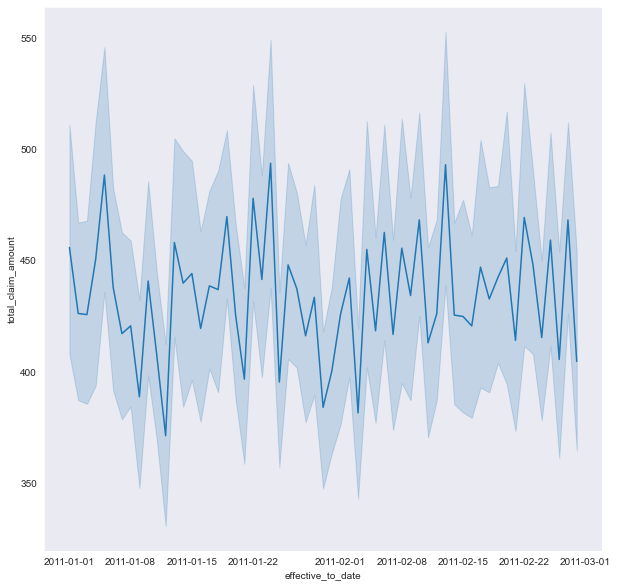

In [46]:
import seaborn as sns

sns.set_style('dark')

plt.figure(figsize=(10, 10))
sns.lineplot(x='effective_to_date', y='total_claim_amount', data=customer_df)
plt.show()

In [47]:
import pandas as pd
import datetime

# Create a new DataFrame with the required columns
date_df = pd.DataFrame(columns=['day', 'day_name', 'week', 'month', 'total_claim_amount'])

# Add the columns to the new DataFrame
date_df['day'] = customer_df['effective_to_date'].dt.day
date_df['day_name'] = customer_df['effective_to_date'].dt.day_name()
date_df['week'] = customer_df['effective_to_date'].dt.week
date_df['month'] = customer_df['effective_to_date'].dt.month_name()
date_df['total_claim_amount'] = customer_df['total_claim_amount']

C:\Users\Dell\AppData\Local\Temp/ipykernel_13176/139388058.py:10: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  date_df['week'] = customer_df['effective_to_date'].dt.week


In [48]:
date_df.columns

Index(['day', 'day_name', 'week', 'month', 'total_claim_amount'], dtype='object')

In [49]:
target = date_df.groupby('day_name')['total_claim_amount'].sum().round(2)

In [50]:
list_of_correct_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

target = target.reindex(index=list_of_correct_days)

In [51]:
target

day_name
Monday       655689.71
Tuesday      502518.93
Wednesday    541563.05
Thursday     541820.80
Friday       533658.79
Saturday     608060.10
Sunday       581655.66
Name: total_claim_amount, dtype: float64

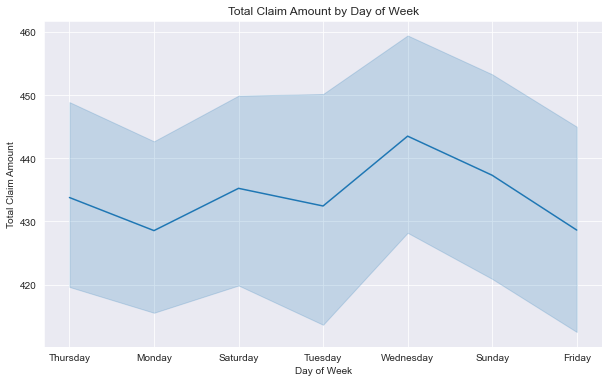

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("darkgrid")

plt.figure(figsize=(10, 6))
sns.lineplot(data=date_df, x="day_name", y="total_claim_amount")
plt.title("Total Claim Amount by Day of Week")
plt.xlabel("Day of Week")
plt.ylabel("Total Claim Amount")
plt.show()


In [53]:
list_of_correct_values = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
claims_by_day = date_df.groupby('day_name')['total_claim_amount'].count().reindex(index=list_of_correct_values)

In [54]:
claims_by_day

day_name
Monday       1530
Tuesday      1162
Wednesday    1221
Thursday     1249
Friday       1245
Saturday     1397
Sunday       1330
Name: total_claim_amount, dtype: int64

In [55]:
median_by_day = date_df.groupby('day_name')['total_claim_amount'].median().sort_values(ascending=False)


In [56]:
median_by_day

day_name
Thursday     395.328407
Wednesday    392.235698
Monday       385.735705
Sunday       383.721164
Saturday     379.200000
Tuesday      378.490829
Friday       371.803029
Name: total_claim_amount, dtype: float64

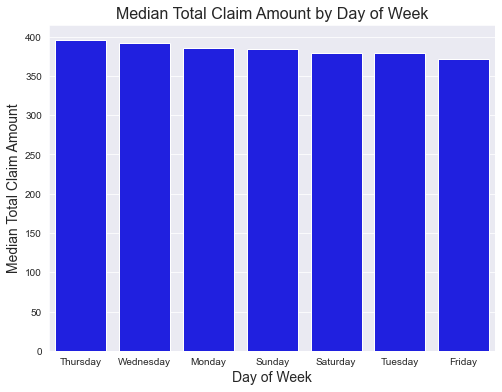

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the median target by day of the week name
median_target = date_df.groupby('day_name')['total_claim_amount'].median().sort_values(ascending=False)

# Create a bar plot using seaborn
plt.figure(figsize=(8,6))
sns.barplot(x=median_target.index, y=median_target, color='blue')
plt.title('Median Total Claim Amount by Day of Week', fontsize=16)
plt.xlabel('Day of Week', fontsize=14)
plt.ylabel('Median Total Claim Amount', fontsize=14)
plt.show()

In [58]:
target_by_month = date_df.groupby('month')['total_claim_amount'].sum().round(2)
target_by_month = target_by_month.reindex(index=list_of_correct_values)

In [59]:
month_df = customer_df[['effective_to_date', 'total_claim_amount']].copy()
month_df['month'] = pd.to_datetime(month_df['effective_to_date']).dt.strftime('%B')
month_df = month_df[['month', 'total_claim_amount']]
month_median = month_df.groupby('month')['total_claim_amount'].agg('median').round(2)

In [60]:
correct_month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
month_median = month_median.reindex(index=correct_month_order)

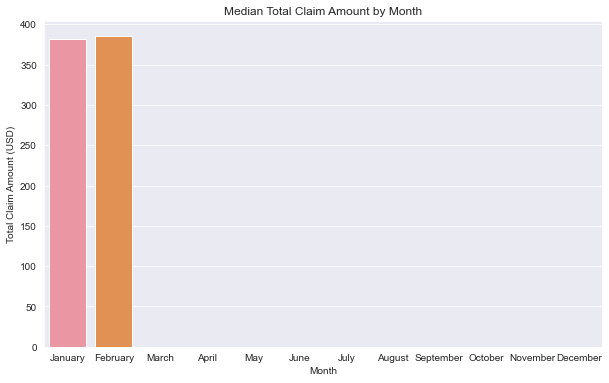

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("darkgrid")
plt.figure(figsize=(10,6))
sns.barplot(x=month_median.index, y=month_median.values)
plt.title("Median Total Claim Amount by Month")
plt.xlabel("Month")
plt.ylabel("Total Claim Amount (USD)")
plt.show()

In [62]:
import pandas as pd
import numpy as np

def remove_outliers(df, thr=3):
    # Loop through each column in the dataframe
    for col in df.columns:
        # Calculate the mean and standard deviation
        col_mean = df[col].mean()
        col_std = df[col].std()

        # Create a boolean mask for the outliers
        outliers_mask = np.abs(df[col] - col_mean) > thr * col_std

        # Replace the outliers with NaN values
        df.loc[outliers_mask, col] = np.nan

    # Drop rows with any NaN values and reset the index
    clean_df = df.dropna().reset_index(drop=True)

    return clean_df

In [63]:
continuous_df

,customer_lifetime_value,income,monthly_premium_auto,months_since_policy_inception,total_claim_amount
0,2763.519279,56274,69,5,384.811147
1,6979.535903,0,94,42,1131.464935
2,12887.431650,48767,108,38,566.472247
3,7645.861827,0,106,65,529.881344
4,2813.692575,43836,73,44,138.130879
...,...,...,...,...,...
9129,23405.987980,71941,73,89,198.234764
9130,3096.511217,21604,79,28,379.200000
9131,8163.890428,0,85,37,790.784983
9132,7524.442436,21941,96,3,691.200000


In [64]:
import pandas as pd
import numpy as np

def remove_outliers(df, thr=3):
    # Loop through each column in the dataframe
    for col in df.columns:
        # Calculate the mean and standard deviation
        col_mean = df[col].mean()
        col_std = df[col].std()

        # Create a boolean mask for the outliers
        outliers_mask = np.abs(df[col] - col_mean) > thr * col_std

        # Replace the outliers with NaN values
        df.loc[outliers_mask, col] = np.nan

    # Drop rows with any NaN values and reset the index
    clean_df = df.dropna().reset_index(drop=True)

    return clean_df

# Example usage
continuous_clean_df = remove_outliers(continuous_df)

C:\Users\Dell\anaconda3\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [65]:
continuous_clean_df

,customer_lifetime_value,income,monthly_premium_auto,months_since_policy_inception,total_claim_amount
0,2763.519279,56274.0,69.0,5.0,384.811147
1,6979.535903,0.0,94.0,42.0,1131.464935
2,12887.431650,48767.0,108.0,38.0,566.472247
3,7645.861827,0.0,106.0,65.0,529.881344
4,2813.692575,43836.0,73.0,44.0,138.130879
...,...,...,...,...,...
8665,23405.987980,71941.0,73.0,89.0,198.234764
8666,3096.511217,21604.0,79.0,28.0,379.200000
8667,8163.890428,0.0,85.0,37.0,790.784983
8668,7524.442436,21941.0,96.0,3.0,691.200000


In [66]:
# concatenate the dataframes
df = pd.concat([continuous_clean_df, discrete_df, categorical, date_df['week']], axis=1)

# drop the NaN values and reset the index
df = df.dropna().reset_index(drop=True)

In [67]:
df

,customer_lifetime_value,income,monthly_premium_auto,months_since_policy_inception,total_claim_amount,months_since_last_claim,number_of_open_complaints,number_of_policies,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size,week
0,2763.519279,56274.0,69.0,5.0,384.811147,32,0,1,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,L3,Offer1,Agent,Two-Door Car,Medsize,8
1,6979.535903,0.0,94.0,42.0,1131.464935,13,0,8,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,L3,Offer3,Agent,Four-Door Car,Medsize,5
2,12887.431650,48767.0,108.0,38.0,566.472247,18,0,2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,L3,Offer1,Agent,Two-Door Car,Medsize,7
3,7645.861827,0.0,106.0,65.0,529.881344,18,0,7,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,L2,Offer1,Call Center,SUV,Medsize,3
4,2813.692575,43836.0,73.0,44.0,138.130879,12,0,1,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,L1,Offer1,Agent,Four-Door Car,Medsize,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8501,23405.987980,71941.0,73.0,89.0,198.234764,21,1,6,California,No,Basic,College,Medical Leave,M,Suburban,Married,L2,Offer1,Web,Four-Door Car,Medsize,2
8502,3096.511217,21604.0,79.0,28.0,379.200000,25,0,1,California,No,Basic,Master,Medical Leave,F,Rural,Married,L2,Offer2,Branch,Four-Door Car,Medsize,4
8503,8163.890428,0.0,85.0,37.0,790.784983,23,0,1,California,No,Extended,High School or Below,Unemployed,M,Suburban,Single,L3,Offer2,Call Center,Two-Door Car,Small,6
8504,7524.442436,21941.0,96.0,3.0,691.200000,11,0,6,California,No,Basic,High School or Below,Unemployed,M,Suburban,Single,L2,Offer3,Agent,Four-Door Car,Medsize,1


In [68]:
df.columns

Index(['customer_lifetime_value', 'income', 'monthly_premium_auto',
       'months_since_policy_inception', 'total_claim_amount',
       'months_since_last_claim', 'number_of_open_complaints',
       'number_of_policies', 'state', 'response', 'coverage', 'education',
       'employmentstatus', 'gender', 'location_code', 'marital_status',
       'policy', 'renew_offer_type', 'sales_channel', 'vehicle_class',
       'vehicle_size', 'week'],
      dtype='object')

In [69]:
df = df.reindex(columns=['customer_lifetime_value', 'income', 'monthly_premium_auto',
                         'months_since_policy_inception', 'months_since_last_claim', 
                         'number_of_open_complaints', 'number_of_policies', 'state',
                         'response', 'coverage', 'education', 'employmentstatus', 'gender',
                         'location_code', 'marital_status', 'policy', 'renew_offer_type',
                         'sales_channel', 'vehicle_class', 'vehicle_size', 'week', 
                         'total_claim_amount'])

In [70]:
df

,customer_lifetime_value,income,monthly_premium_auto,months_since_policy_inception,months_since_last_claim,number_of_open_complaints,number_of_policies,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size,week,total_claim_amount
0,2763.519279,56274.0,69.0,5.0,32,0,1,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,L3,Offer1,Agent,Two-Door Car,Medsize,8,384.811147
1,6979.535903,0.0,94.0,42.0,13,0,8,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,L3,Offer3,Agent,Four-Door Car,Medsize,5,1131.464935
2,12887.431650,48767.0,108.0,38.0,18,0,2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,L3,Offer1,Agent,Two-Door Car,Medsize,7,566.472247
3,7645.861827,0.0,106.0,65.0,18,0,7,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,L2,Offer1,Call Center,SUV,Medsize,3,529.881344
4,2813.692575,43836.0,73.0,44.0,12,0,1,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,L1,Offer1,Agent,Four-Door Car,Medsize,5,138.130879
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8501,23405.987980,71941.0,73.0,89.0,21,1,6,California,No,Basic,College,Medical Leave,M,Suburban,Married,L2,Offer1,Web,Four-Door Car,Medsize,2,198.234764
8502,3096.511217,21604.0,79.0,28.0,25,0,1,California,No,Basic,Master,Medical Leave,F,Rural,Married,L2,Offer2,Branch,Four-Door Car,Medsize,4,379.200000
8503,8163.890428,0.0,85.0,37.0,23,0,1,California,No,Extended,High School or Below,Unemployed,M,Suburban,Single,L3,Offer2,Call Center,Two-Door Car,Small,6,790.784983
8504,7524.442436,21941.0,96.0,3.0,11,0,6,California,No,Basic,High School or Below,Unemployed,M,Suburban,Single,L2,Offer3,Agent,Four-Door Car,Medsize,1,691.200000


In [71]:
df['response'] = df['response'].replace({'Yes': 1, 'No': 0})

In [72]:
df['employmentstatus'].replace(["Medical Leave", "Disabled", "Retired"], "Inactive", inplace=True)

In [73]:
print(df['gender'].unique())

['F' 'M']


In [74]:
gender_map = {"F": 0, "M": 1}
df["gender"] = df["gender"].map(gender_map)

In [75]:
# Create a dictionary to map the values
vehicle_class_mapping = {"Sports Car": "Luxury", "Luxury SUV": "Luxury", "Luxury Car": "Luxury"}

# Use the map() function to apply the dictionary to the column
df["vehicle_class"] = df["vehicle_class"].map(vehicle_class_mapping).fillna(df["vehicle_class"])

In [76]:
coverage_map = {
    'Basic': 1,
    'Extended': 2,
    'Premium': 3
}

df['coverage'] = df['coverage'].replace(coverage_map)

In [77]:
# define the encoding scheme
employmentstatus_map = {'Employed': 2, 'Inactive': 1, 'Unemployed': 0}

# apply the encoding using the map method
df['employmentstatus'] = df['employmentstatus'].map(employmentstatus_map)


In [78]:
location_mapping = {'Urban': 2, 'Suburban': 1, 'Rural': 0}
df['location_code'] = df['location_code'].map(location_mapping)

In [79]:
vehicle_size_map = {"Large": 2, "Medsize": 1, "Small": 0}
df["vehicle_size"] = df["vehicle_size"].map(vehicle_size_map)


In [80]:
# Identify the categorical nominal columns
categorical_nominal_cols = []
for col in df.columns:
    if df[col].dtype == object and df[col].nunique() < 10:
        categorical_nominal_cols.append(col)

# Create a new dataframe with the categorical nominal columns
categorical_nominal_df = df[categorical_nominal_cols]

In [81]:
categorical_nominal_df

,state,education,marital_status,policy,renew_offer_type,sales_channel,vehicle_class
0,Washington,Bachelor,Married,L3,Offer1,Agent,Two-Door Car
1,Arizona,Bachelor,Single,L3,Offer3,Agent,Four-Door Car
2,Nevada,Bachelor,Married,L3,Offer1,Agent,Two-Door Car
3,California,Bachelor,Married,L2,Offer1,Call Center,SUV
4,Washington,Bachelor,Single,L1,Offer1,Agent,Four-Door Car
...,...,...,...,...,...,...,...
8501,California,College,Married,L2,Offer1,Web,Four-Door Car
8502,California,Master,Married,L2,Offer2,Branch,Four-Door Car
8503,California,High School or Below,Single,L3,Offer2,Call Center,Two-Door Car
8504,California,High School or Below,Single,L2,Offer3,Agent,Four-Door Car


In [82]:
# create a list of the categorical nominal columns
categorical_nominal_cols = ['state', 'response', 'education', 'employmentstatus', 'gender', 'marital_status', 'policy', 'renew_offer_type', 'sales_channel', 'vehicle_class']

# create a list of named levels
levels = []

# loop through each categorical nominal column and get its unique values
for col in categorical_nominal_cols:
    unique_vals = df[col].unique()
    levels.append(list(unique_vals))

print(levels)

[['Washington', 'Arizona', 'Nevada', 'California', 'Oregon'], [0, 1], ['Bachelor', 'College', 'Master', 'High School or Below', 'Doctor'], [2, 0, 1], [0, 1], ['Married', 'Single', 'Divorced'], ['L3', 'L2', 'L1'], ['Offer1', 'Offer3', 'Offer2', 'Offer4'], ['Agent', 'Call Center', 'Web', 'Branch'], ['Two-Door Car', 'Four-Door Car', 'SUV', 'Luxury']]


In [83]:
from sklearn.preprocessing import OneHotEncoder


encoder = OneHotEncoder(drop='first', categories=levels)

In [84]:
encoder

OneHotEncoder(categories=[['Washington', 'Arizona', 'Nevada', 'California',
                           'Oregon'],
                          [0, 1],
                          ['Bachelor', 'College', 'Master',
                           'High School or Below', 'Doctor'],
                          [2, 0, 1], [0, 1], ['Married', 'Single', 'Divorced'],
                          ['L3', 'L2', 'L1'],
                          ['Offer1', 'Offer3', 'Offer2', 'Offer4'],
                          ['Agent', 'Call Center', 'Web', 'Branch'],
                          ['Two-Door Car', 'Four-Door Car', 'SUV', 'Luxury']],
              drop='first')

# comparing regression models

In [85]:
df

,customer_lifetime_value,income,monthly_premium_auto,months_since_policy_inception,months_since_last_claim,number_of_open_complaints,number_of_policies,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size,week,total_claim_amount
0,2763.519279,56274.0,69.0,5.0,32,0,1,Washington,0,1,Bachelor,2,0,1,Married,L3,Offer1,Agent,Two-Door Car,1,8,384.811147
1,6979.535903,0.0,94.0,42.0,13,0,8,Arizona,0,2,Bachelor,0,0,1,Single,L3,Offer3,Agent,Four-Door Car,1,5,1131.464935
2,12887.431650,48767.0,108.0,38.0,18,0,2,Nevada,0,3,Bachelor,2,0,1,Married,L3,Offer1,Agent,Two-Door Car,1,7,566.472247
3,7645.861827,0.0,106.0,65.0,18,0,7,California,0,1,Bachelor,0,1,1,Married,L2,Offer1,Call Center,SUV,1,3,529.881344
4,2813.692575,43836.0,73.0,44.0,12,0,1,Washington,0,1,Bachelor,2,1,0,Single,L1,Offer1,Agent,Four-Door Car,1,5,138.130879
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8501,23405.987980,71941.0,73.0,89.0,21,1,6,California,0,1,College,1,1,1,Married,L2,Offer1,Web,Four-Door Car,1,2,198.234764
8502,3096.511217,21604.0,79.0,28.0,25,0,1,California,0,1,Master,1,0,0,Married,L2,Offer2,Branch,Four-Door Car,1,4,379.200000
8503,8163.890428,0.0,85.0,37.0,23,0,1,California,0,2,High School or Below,0,1,1,Single,L3,Offer2,Call Center,Two-Door Car,0,6,790.784983
8504,7524.442436,21941.0,96.0,3.0,11,0,6,California,0,1,High School or Below,0,1,1,Single,L2,Offer3,Agent,Four-Door Car,1,1,691.200000


In [87]:
X = df.drop(['AVGGIFT',' customer_lifetime_value','state'],axis=1)
y = df['total_claim_amount']

In [91]:
# Define X and y
X = df.drop('total_claim_amount', axis=1)
y = df['total_claim_amount']

# Import train_test_split and split the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=31)

# Separate numerical and categorical features
X_train_num = X_train.select_dtypes(include='number')
X_train_cat = X_train.select_dtypes(include='object')
X_test_num = X_test.select_dtypes(include='number')
X_test_cat = X_test.select_dtypes(include='object')

# Encode categorical features using OneHotEncoder
from sklearn.preprocessing import OneHotEncoder

# Create a list of named levels for each categorical column
levels = [
    X_train_cat[col].unique().tolist() for col in X_train_cat.columns
]

# instantiate OneHotEncoder
encoder = OneHotEncoder(drop='first', categories=levels)

# fit and transform the training set
X_train_cat_encoded = encoder.fit_transform(X_train_cat).toarray()
X_train_cat_encoded_df = pd.DataFrame(X_train_cat_encoded,
                                      columns=encoder.get_feature_names(X_train_cat.columns),
                                      index=X_train_cat.index)

# transform the test set
X_test_cat_encoded = encoder.transform(X_test_cat).toarray()
X_test_cat_encoded_df = pd.DataFrame(X_test_cat_encoded,
                                     columns=encoder.get_feature_names(X_test_cat.columns),
                                     index=X_test_cat.index)

In [92]:
from sklearn.preprocessing import PowerTransformer

# instantiate the power transformer
pt = PowerTransformer()

# fit and transform the numerical data in X_train and X_test
X_train_num_transformed = pt.fit_transform(X_train_num)
X_test_num_transformed = pt.transform(X_test_num)

# convert the resulting numpy arrays to pandas dataframes
X_train_num_transformed_df = pd.DataFrame(X_train_num_transformed, columns=X_train_num.columns, index=X_train_num.index)
X_test_num_transformed_df = pd.DataFrame(X_test_num_transformed, columns=X_test_num.columns, index=X_test_num.index)

In [93]:
# concatenate the transformed numerical and categorical dataframes
X_train_new = pd.concat([X_train_num_transformed_df, X_train_cat_encoded_df], axis=1)
X_test_new = pd.concat([X_test_num_transformed_df, X_test_cat_encoded_df], axis=1)

In [103]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_new_scaled = scaler.fit_transform(X_train_new)
X_test_new_scaled = scaler.transform(X_test_new)

X_train_new_scaled = pd.DataFrame(X_train_new_scaled, columns=X_train_new.columns, index=X_train_new.index)
X_test_new_scaled_df = pd.DataFrame(X_test_new_scaled, columns=X_test_new.columns, index=X_test_new.index)


In [104]:
from sklearn.linear_model import LinearRegression

# Instantiate the model
lr = LinearRegression()

# Train the model on the training data
lr.fit(X_train_new_scaled_df, y_train)

# Get predictions for the training and test data
train_preds = lr.predict(X_train_new_scaled_df)
test_preds = lr.predict(X_test_new_scaled_df)
y_train_pred = lr.predict(X_train_new_scaled_df)
y_test_pred = lr.predict(X_test_new_scaled_df)

In [109]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def get_error_metrics(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    r2 = r2_score(y_true, y_pred)

    df_metrics = pd.DataFrame({
        'Error_metric': ['MAE', 'MSE', 'RMSE', 'MAPE', 'R2'],
        'Value': [mae, mse, rmse, mape, r2]
    })

    return df_metrics

In [110]:
df_metrics_train = get_error_metrics(y_train, y_train_pred)
df_metrics_test = get_error_metrics(y_test, y_test_pred)

In [111]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculate the predictions for the train and test sets
y_train_pred = lr_model.predict(X_train_new_scaled_df)
y_test_pred = lr_model.predict(X_test_new_scaled_df)

# Define a function to calculate the required metrics
def calculate_metrics(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = mean_squared_error(y_true, y_pred, squared=False)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    r2 = r2_score(y_true, y_pred)
    return pd.DataFrame({'Error_metric': ['MAE', 'MSE', 'RMSE', 'MAPE', 'R2'],
                         'Value': [mae, mse, rmse, mape, r2]})

# Calculate the metrics for the train set
train_metrics = calculate_metrics(y_train, y_train_pred)
print('Train Metrics:')
print(train_metrics)

# Calculate the metrics for the test set
test_metrics = calculate_metrics(y_test, y_test_pred)
print('Test Metrics:')
print(test_metrics)

NameError: name 'lr_model' is not defined

In [99]:
test_metrics1.head()


NameError: name 'test_metrics1' is not defined

In [100]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor

def train_models(models, X_train, y_train):
    trained_models = []
    for model in models:
        if model == 'LinearRegression':
            lr_model = LinearRegression()
            lr_model.fit(X_train, y_train)
            trained_models.append(lr_model)
        elif model == 'KNeighborsRegressor':
            knn_model = KNeighborsRegressor()
            knn_model.fit(X_train, y_train)
            trained_models.append(knn_model)
        elif model == 'MLPRegressor':
            mlp_model = MLPRegressor(max_iter=1000)
            mlp_model.fit(X_train, y_train)
            trained_models.append(mlp_model)
    return trained_models

In [101]:
models = [LinearRegression(), KNeighborsRegressor(), MLPRegressor()]

trained_models = train_models(models, X_train, y_train)

In [102]:
trained_models

[]